# Basic preprocessing of the corpus

## Run notebook 02

We need this so that we can use the variables from that notebook.

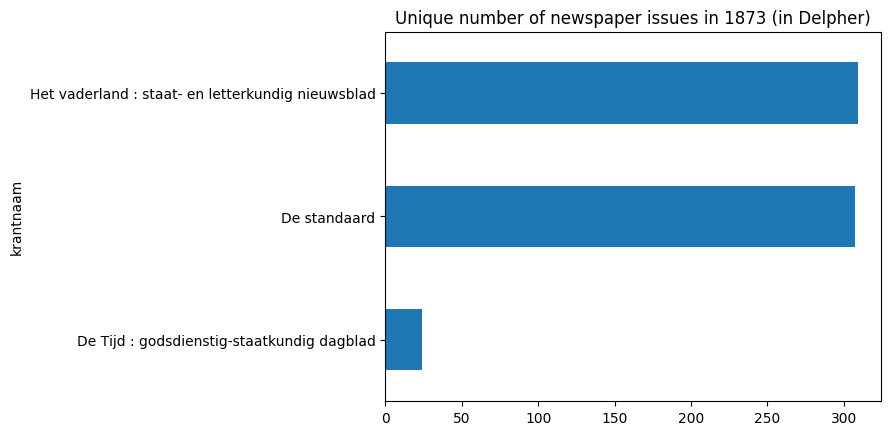

In [1]:
%run 02_Loading_data_and_visualizing_corpus.ipynb 

### Check if DataFrame is stored correctly

In [2]:
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day
7119,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,Telegrammen.,1873-01-01,Rome.3o Dec. De 1 talienische Nachrichten meld...,De standaard,Landelijk,January,Wednesday
7133,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,WATERHOOGTE.,1873-01-01,"M<i.bh'i;n,27l>cc. 10 »:. 0 dm. Gtv. 4 dm. CoU...",De standaard,Landelijk,January,Wednesday
7132,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,KOERS VAN ANTWERPEN 30 Dec. 1872.,1873-01-01,Amiterdam ztgt £r. 210.05 Geld. fr. 210 30 pap...,De standaard,Landelijk,January,Wednesday
7131,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,Koers van het geld bij de Ned. Bank sedert 12 ...,1873-01-01,Wissel-DUcuulo S jiCt.; Promeneu-DijconU 51') ...,De standaard,Landelijk,January,Wednesday
7130,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,Prijzen van Coupons,1873-01-01,«etfcllirk / 22.05. Dila NV.Uale /2t.57Vj. Div...,De standaard,Landelijk,January,Wednesday


## Load NLP model

Import the necessary packages.

In [3]:
import spacy
from spacy.lang.nl.examples import sentences

Load the Dutch natural language processing (NLP) package.

In [4]:
nlp = spacy.load("nl_core_news_sm")

## Create Doc items

Create a helper function. We will use this in the next step.

In [5]:
def process_text(text):
    return nlp(text)

Create a new column in the pandas DataFrame, called "doc". This column stores the content of each article in a way that is easy to use in later steps of this tutorial.

> Note that running the next cell takes approximately 10 minutes.


In [6]:
data["doc"] = data["content"].apply(process_text)


ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>

In [ ]:
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day,doc
914,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Handelsberichten.,1873-01-01,"Amsterdam, 30 December. P Granen. Tarwe: O. wi...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Amsterdam, ,, 30, December, ., P, Granen, ., ..."
907,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Residentienieuws.,1873-01-01,"Men verzekert ons, dat eenige leden van de Twe...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Men, verzekert, ons, ,, dat, eenige, leden, v..."
908,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,"Korte berichten uit het Binnenland,",1873-01-01,Op den tweeden Kerstdag viel de conducteur G. ...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Op, den, tweeden, Kerstdag, viel, de, conduct..."
909,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Onderwijs Lager Onderwijs Vacante planteen voo...,1873-01-01,"Te Ommelauderwijk, a ƒ4OO en vrije woning; te ...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Te, Ommelauderwijk, ,, a, ƒ4OO, en, vrije, wo..."
910,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Vacante plaatsen voor Hulponderwijzers.,1873-01-01,"Te Alkmaar, a ƒ400; —le Alfen, k ƒ 450; —te Be...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Te, Alkmaar, ,, a, ƒ400, ;, —, le, Alfen, ,, ..."


## Tokenization

Tokenization refers to the process of breaking down a piece of text into small units, called 'tokens'. In our case, the tokens are the words in an article, but tokens can also consist of parts of words or characters. Tokenization is a crucial part of NLP.

Create a helper function. We will use this in the next step.

In [ ]:
def get_token(doc):
    return [(token.text) for token in doc]

Create a "Token" column in the DataFrame. This column stores the words in each article as a list, which is useful in later steps.

In [ ]:
data['tokens'] = data['doc'].apply(get_token)

In [ ]:
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day,doc,tokens
914,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Handelsberichten.,1873-01-01,"Amsterdam, 30 December. P Granen. Tarwe: O. wi...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Amsterdam, ,, 30, December, ., P, Granen, ., ...","[Amsterdam, ,, 30, December, ., P, Granen, ., ..."
907,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Residentienieuws.,1873-01-01,"Men verzekert ons, dat eenige leden van de Twe...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Men, verzekert, ons, ,, dat, eenige, leden, v...","[Men, verzekert, ons, ,, dat, eenige, leden, v..."
908,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,"Korte berichten uit het Binnenland,",1873-01-01,Op den tweeden Kerstdag viel de conducteur G. ...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Op, den, tweeden, Kerstdag, viel, de, conduct...","[Op, den, tweeden, Kerstdag, viel, de, conduct..."
909,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Onderwijs Lager Onderwijs Vacante planteen voo...,1873-01-01,"Te Ommelauderwijk, a ƒ4OO en vrije woning; te ...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Te, Ommelauderwijk, ,, a, ƒ4OO, en, vrije, wo...","[Te, Ommelauderwijk, ,, a, ƒ4OO, en, vrije, wo..."
910,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Vacante plaatsen voor Hulponderwijzers.,1873-01-01,"Te Alkmaar, a ƒ400; —le Alfen, k ƒ 450; —te Be...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday,"(Te, Alkmaar, ,, a, ƒ400, ;, —, le, Alfen, ,, ...","[Te, Alkmaar, ,, a, ƒ400, ;, —, le, Alfen, ,, ..."


## Lemmatization

Lemmatization is the process of reducing words to their most basic form, known as the lemma. For example, the lemma of 'running' is 'run' and the lemma of 'better' is 'good'. Lemmatization is important for NLP, because it reduces the complexity of a text, improves accuracy of many NLP tasks, and leads to better semantic understanding. 

Create a helper function. We will use this function in the next step.

In [ ]:
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

Create 'lemma' column in the DataFrame.

In [ ]:
data['lemmas'] = data['doc'].apply(get_lemma)

Display lemmas and tokens.

In [ ]:
data[['tokens', 'lemmas']].head()

,tokens,lemmas
914,"[Amsterdam, ,, 30, December, ., P, Granen, ., ...","[Amsterdam, ,, 30, December, ., P, Granen, ., ..."
907,"[Men, verzekert, ons, ,, dat, eenige, leden, v...","[men, verzekeren, ons, ,, dat, eenig, lid, van..."
908,"[Op, den, tweeden, Kerstdag, viel, de, conduct...","[op, den, tweed, Kerstdag, vallen, de, conduct..."
909,"[Te, Ommelauderwijk, ,, a, ƒ4OO, en, vrije, wo...","[te, Ommelauderwijk, ,, a, ƒ4OO, en, vrij, won..."
910,"[Te, Alkmaar, ,, a, ƒ400, ;, —, le, Alfen, ,, ...","[te, Alkmaar, ,, a, ƒ400, ;, —, le, Alfen, ,, ..."


Comparing the tokens with the lemmas, we can see how some words have been reduced to their root form. For example, 'viel' has been changed to 'vallen'. However, we can also see that 'tweeden' has been changed to 'tweed'. This change is more questionable. 

## Count number of words in each article

In the next code block, we will count the number of words in each article and store it in a separate column, called 'article_length'. We will use this information to make a comparison between the different newspapers in the next Notebook. 

In [ ]:
## Retrieve the length of each article in the corpus and store it in the DataFrame

## Create empty list to store the lengths
article_lengths = []

## Retrieve length of each article and store in list
for index, row in data.iterrows():
    article_lengths.append(len(row['tokens']))

## Append list to DataFrame
data['article_length'] = article_lengths

## Show the first rows of title, tokens and article length in DataFrame                                    
data[['title', 'tokens', 'article_length']].head()

,title,tokens,article_length
914,Handelsberichten.,"[Amsterdam, ,, 30, December, ., P, Granen, ., ...",344
907,Residentienieuws.,"[Men, verzekert, ons, ,, dat, eenige, leden, v...",2329
908,"Korte berichten uit het Binnenland,","[Op, den, tweeden, Kerstdag, viel, de, conduct...",315
909,Onderwijs Lager Onderwijs Vacante planteen voo...,"[Te, Ommelauderwijk, ,, a, ƒ4OO, en, vrije, wo...",64
910,Vacante plaatsen voor Hulponderwijzers.,"[Te, Alkmaar, ,, a, ƒ400, ;, —, le, Alfen, ,, ...",236


## Write new dataset into separate file

In [ ]:
data.to_csv('data_preprocessed.csv', index=False)

We now have a created a new file, called 'data_preprocessed.csv'. We will use this in the next Notebooks.